In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer


In [2]:
### Binning and Binarization

Binning and binarization are techniques used in data preprocessing to transform numerical data into categorical data or binary data.

### Binning

Binning (or discretization) is the process of converting continuous numerical values into discrete intervals, or "bins." This can simplify the model and sometimes improve performance, especially for algorithms that do not assume any particular distribution of the data.

#### Types of Binning:
1. **Equal-width Binning:**
   - Divides the range of the data into intervals of equal width.
   - Example: Dividing ages into bins of size 10 (0-10, 11-20, 21-30, etc.)

2. **Equal-frequency Binning:**
   - Divides the data such that each bin contains approximately the same number of observations.
   - Example: Sorting ages and then creating bins so that each bin has 20% of the data.

3. **Custom Binning:**
   - User-defined bin edges based on domain knowledge.
   - Example: Defining bins based on specific age ranges (0-18, 19-35, 36-50, etc.)

### Example of Binning in Python:

```python
import numpy as np
import pandas as pd

# Sample data
data = {
    'Age': [23, 45, 56, 29, 35, 42, 27, 33, 38, 49]
}

df = pd.DataFrame(data)

# Equal-width binning into 3 bins
df['Age_Binned'] = pd.cut(df['Age'], bins=3, labels=["Young", "Middle-aged", "Old"])

# Equal-frequency binning into 3 bins
df['Age_Binned_Freq'] = pd.qcut(df['Age'], q=3, labels=["Young", "Middle-aged", "Old"])

print(df)
```

### Output:
```
   Age Age_Binned Age_Binned_Freq
0   23      Young           Young
1   45       Old     Middle-aged
2   56       Old             Old
3   29      Young           Young
4   35  Middle-aged     Middle-aged
5   42  Middle-aged     Middle-aged
6   27      Young           Young
7   33  Middle-aged     Middle-aged
8   38  Middle-aged     Middle-aged
9   49       Old             Old
```

### Binarization

Binarization is the process of converting numerical data into binary values (0 or 1) based on a threshold. It is often used when you want to convert continuous features into binary indicators for algorithms that need binary input.

### Example of Binarization in Python:

```python
from sklearn.preprocessing import Binarizer

# Sample data
data = {
    'Age': [23, 45, 56, 29, 35, 42, 27, 33, 38, 49]
}

df = pd.DataFrame(data)

# Binarization with a threshold of 35
binarizer = Binarizer(threshold=35)
df['Age_Binarized'] = binarizer.fit_transform(df[['Age']])

print(df)
```

### Output:
```
   Age  Age_Binarized
0   23              0
1   45              1
2   56              1
3   29              0
4   35              0
5   42              1
6   27              0
7   33              0
8   38              1
9   49              1
```

### `KBinsDiscretizer` in Scikit-Learn

`KBinsDiscretizer` is a powerful tool in scikit-learn for binning continuous data into discrete bins. It supports various strategies like uniform, quantile, and k-means binning.

### Example of `KBinsDiscretizer`:

```python
from sklearn.preprocessing import KBinsDiscretizer

# Sample data
data = np.array([[23], [45], [56], [29], [35], [42], [27], [33], [38], [49]])

# Initialize KBinsDiscretizer
# - n_bins: number of bins
# - encode: method to encode the transformed result (e.g., 'ordinal', 'onehot', 'onehot-dense')
# - strategy: strategy to define the width of the bins ('uniform', 'quantile', 'kmeans')
kbd = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')

# Fit and transform the data
binned_data = kbd.fit_transform(data)

print("Original Data:\n", data.flatten())
print("Binned Data:\n", binned_data.flatten())
```

### Output:
```
Original Data:
 [23 45 56 29 35 42 27 33 38 49]
Binned Data:
 [0. 2. 2. 0. 1. 2. 0. 1. 1. 2.]
```

### Explanation:
- **Initialization Parameters:**
  - `n_bins=3`: Number of bins to divide the data into.
  - `encode='ordinal'`: The result is encoded as ordinal integers.
  - `strategy='uniform'`: Each bin has the same width.

- **Fit and Transform:**
  - The `fit_transform` method calculates the bin edges and transforms the data accordingly.

### Summary

- **Binning** converts continuous values into discrete intervals, which can be done using equal-width, equal-frequency, or custom strategies.
- **Binarization** converts continuous values into binary values based on a threshold.
- `KBinsDiscretizer` in scikit-learn provides a versatile way to discretize continuous data using various strategies and encoding methods.

These preprocessing techniques are essential for preparing data for machine learning models, especially when dealing with algorithms that prefer categorical or binary inputs.


SyntaxError: invalid syntax (<ipython-input-2-1c40e3e0efee>, line 3)

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [7]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [8]:
df.dropna(inplace = True)

In [9]:
df.shape

(714, 3)

In [10]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [11]:
X = df.iloc[:,1:]
Y = df.iloc[:,0]


In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [16]:
X_train.head()

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542
253,30.0,16.1000
719,33.0,7.7750
666,25.0,13.0000


In [17]:
y_train.head()

328    1
73     0
253    0
719    0
666    0
Name: Survived, dtype: int64

In [18]:
clf = DecisionTreeClassifier()


In [19]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [20]:
y_pred

array([1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1])

In [21]:
accuracy_score(y_test,y_pred)

0.6293706293706294

In [22]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,Y,cv=10,scoring='accuracy'))

0.6330790297339592

In [23]:
kbin_age = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')

In [24]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [32]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [33]:
trf

ColumnTransformer(transformers=[('first',
                                 KBinsDiscretizer(encode='ordinal', n_bins=15),
                                 [0]),
                                ('second',
                                 KBinsDiscretizer(encode='ordinal', n_bins=15),
                                 [1])])

In [37]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ],
      dtype=object)

In [38]:
trf.named_transformers_['second'].bin_edges_

array([array([  0.    ,   7.25  ,   7.775 ,   7.8958,   8.1583,  10.5   ,
               13.    ,  14.4542,  18.75  ,  26.    ,  26.55  ,  31.275 ,
               51.4792,  76.2917, 108.9   , 512.3292])                   ],
      dtype=object)

In [39]:
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

In [40]:
output['age_labels'] = pd.cut(x=X_train['Age'],
                                    bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'],
                                    bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [41]:
output

,age,age_trf,fare,fare_trf,age_labels,fare_labels
328,31.0,8.0,20.5250,8.0,"(30.0, 32.0]","(18.75, 26.0]"
73,26.0,6.0,14.4542,7.0,"(25.0, 28.0]","(13.0, 14.454]"
253,30.0,8.0,16.1000,7.0,"(28.0, 30.0]","(14.454, 18.75]"
719,33.0,9.0,7.7750,2.0,"(32.0, 35.0]","(7.25, 7.775]"
666,25.0,6.0,13.0000,6.0,"(23.0, 25.0]","(10.5, 13.0]"
...,...,...,...,...,...,...
92,46.0,12.0,61.1750,12.0,"(42.0, 47.0]","(51.479, 76.292]"
134,25.0,6.0,13.0000,6.0,"(23.0, 25.0]","(10.5, 13.0]"
337,41.0,11.0,134.5000,14.0,"(38.0, 42.0]","(108.9, 512.329]"
548,33.0,9.0,20.5250,8.0,"(32.0, 35.0]","(18.75, 26.0]"


In [42]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)

In [43]:
accuracy_score(y_test,y_pred2)
#improved

0.6363636363636364

In [45]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X,Y,cv=10,scoring='accuracy'))

0.6317097026604068

In [48]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,Y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()

/home/madara/.local/lib/python3.8/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/home/madara/.local/lib/python3.8/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


0.6400821596244132


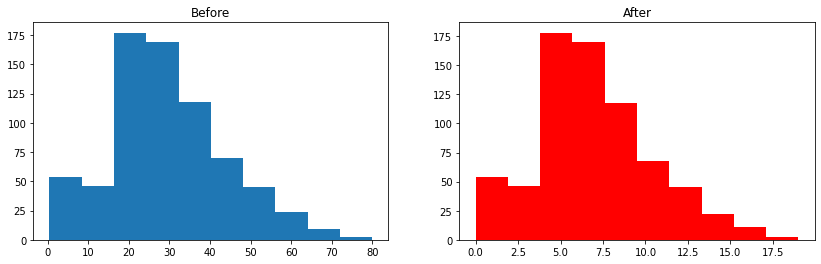

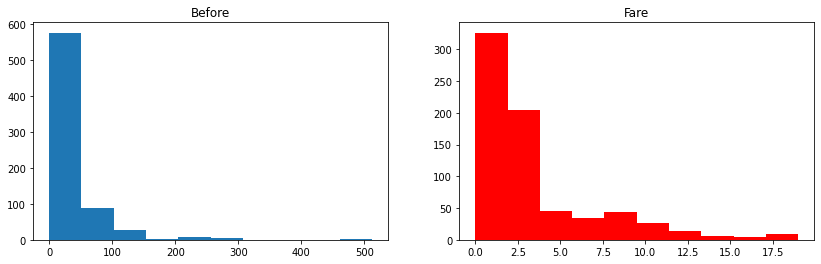

In [51]:
discretize(20,'kmeans')
